<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Lab - 6</b></center>    
<pre>


# Dimensionality Reduction using NumPy




## 🔍 What is Data Reduction?

Data reduction refers to the process of reducing the amount of data that needs to be processed and stored, while preserving the essential patterns in the data.

### Why do we reduce data?
- To reduce computational cost.
- To remove noise and redundant features.
- To improve model performance and training time.
- To visualize high-dimensional data in 2D or 3D.

Common data reduction techniques include:
- Principal Component Analysis (PCA)
- Feature selection
- Sampling



## 📉 What is Principal Component Analysis (PCA)?

PCA is a **dimensionality reduction technique** that transforms a dataset into a new coordinate system. It identifies the **directions (principal components)** where the variance of the data is maximized.

### Key Concepts:
- **Principal Components**: New features (linear combinations of original features) capturing most variance.
- **Eigenvectors & Eigenvalues**: Used to compute these principal directions.
- **Covariance Matrix**: Measures how features vary with each other.

PCA helps in **visualizing high-dimensional data**, **noise reduction**, and **speeding up algorithms**.



## 🧠 NumPy Functions Summary for PCA

| Function | Purpose |
|---------|---------|
| `np.mean(X, axis=0)` | Compute mean of each column (feature-wise mean). |
| `X - np.mean(X, axis=0)` | Centering the data (zero mean). |
| `np.cov(X, rowvar=False)` | Compute covariance matrix for features. |
| `np.linalg.eigh(cov_mat)` | Get eigenvalues and eigenvectors (for symmetric matrices). |
| `np.argsort(values)[::-1]` | Sort values in descending order. |
| `np.dot(X, eigenvectors)` | Project original data onto new axes. |


# Step 1: Load the Iris Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
iris=pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
x=iris.drop(columns='species')
y=iris['species'].map({
    'setosa':0,
    'versicolor':1,
    'virginica':2
})
print('Original Shape : ',x.shape)

Original Shape :  (150, 4)


# Step 2: Standardize the data (zero mean)

In [23]:
x_mean=x-np.mean(x,axis=0)
print("Data after centering : ",x_mean[:5])

Data after centering :     sepal_length  sepal_width  petal_length  petal_width
0     -0.743333     0.442667        -2.358    -0.999333
1     -0.943333    -0.057333        -2.358    -0.999333
2     -1.143333     0.142667        -2.458    -0.999333
3     -1.243333     0.042667        -2.258    -0.999333
4     -0.843333     0.542667        -2.358    -0.999333


# Step 3: Compute the Covariance Matrix

In [25]:
cov_mat=np.cov(x_mean,rowvar=False)
print("Covariance Matrix shape : ",cov_mat.shape)

Covariance Matrix shape :  (4, 4)


# Step 4: Compute eigenvalues and eigenvectors

In [43]:
eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)
print("Eignvalues : ",eigen_values)
print("EognVectors : ",eigen_vectors[:, :2])

Eignvalues :  [0.02383509 0.0782095  0.24267075 4.22824171]
EognVectors :  [[ 0.31548719  0.58202985]
 [-0.3197231  -0.59791083]
 [-0.47983899 -0.07623608]
 [ 0.75365743 -0.54583143]]


# Step 5: Compute eigenvalues and eigenvectors

# Step 6: Select the top k eigenvectors (top 2)

In [41]:
#sort eignvalues and eignvectors in descending order
sorted_index=np.argsort(eigen_values)[::-1]
sorted_eigenvalues=eigen_values[sorted_index]
sorted_eigenvectors=eigen_vectors[:,sorted_index]

print(sorted_index)
print(sorted_eigenvalues)
print(sorted_eigenvectors)

[3 2 1 0]
[4.22824171 0.24267075 0.0782095  0.02383509]
[[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


In [47]:
k=2
eigen_vectors=sorted_eigenvectors[:,0:k]
print(eigen_vectors)

[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


# Step 7: Project the data onto the top k eigenvectors

In [51]:
x_reduced=np.dot(x_mean,eigen_vectors)
print('Reduced data shape : ',x_reduced.shape)

Reduced data shape :  (150, 2)


# Step 8: Plot the PCA-Reduced Data

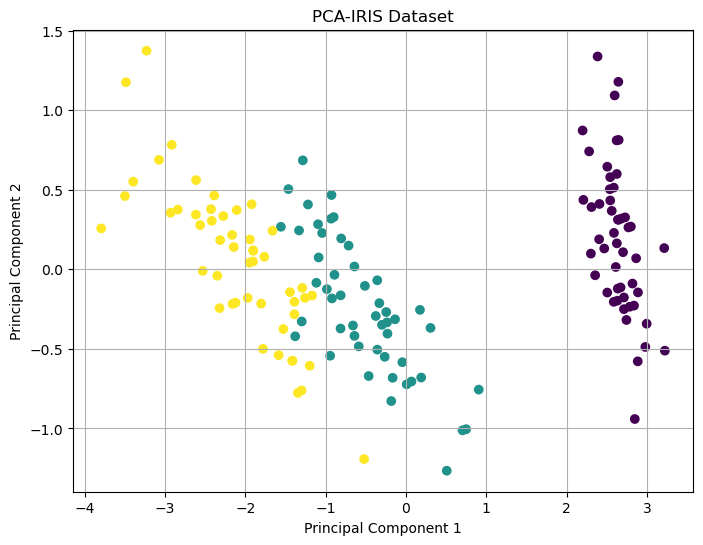

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x_reduced[:,0],x_reduced[:, 1],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-IRIS Dataset')
plt.grid(True)
plt.show()

# Extra - Bining Method

# 5,10,11,13,15,35,50,55,72,92,204,215.
Partition them into three bins by each of the following methods:
(a) equal-frequency (equal-depth) partitioning
(b) equal-width partitioning

In [73]:
values=np.array([5,10,11,13,15,35,50,55,72,92,204,215])

#(a) Equal-Frequency (Equal-Depth) partitioning
equal_freq_bins=pd.qcut(values, q=3, labels=['Bin 1','Bin 2','Bin 3'])

#(b) equal-width partitioning
# max-min/bin and which is first value add in this and it ploat first bean
equal_width_bins=pd.cut(values, bins=3, labels=['Bin 1','Bin 2','Bin 3'])

#Combine Results
binning_result=pd.DataFrame({
    'Value':values,
    'Equal-Frequency Bin':equal_freq_bins,
    'Equal-Width':equal_width_bins
})

binning_result

,Value,Equal-Frequency Bin,Equal-Width
0,5,Bin 1,Bin 1
1,10,Bin 1,Bin 1
2,11,Bin 1,Bin 1
3,13,Bin 1,Bin 1
4,15,Bin 2,Bin 1
5,35,Bin 2,Bin 1
6,50,Bin 2,Bin 1
7,55,Bin 2,Bin 1
8,72,Bin 3,Bin 1
9,92,Bin 3,Bin 2
